<h1 dir=rtl align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Artist Classification
</font>
</h1>


In [1]:
# uncomment the following line if you are running this notebook on Google Colab
# this will install the most recent version of TensorFlow and Keras 3
# !pip install tensorflow --upgrade

In [2]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

In [3]:
import keras
print(keras.__version__)

3.4.1


In [4]:
import os, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, accuracy_score


<h3 dir=rtl align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Download Dataset
</font>
</h3>

<p dir=rtl style="direction: ltr; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>This Dataset is about 580 MB
</font>
</p>


`!gdown 1-0d315aj7Ai8NNqat65XDvaOcHDcHiUD`

<span dir=ltr style="direction:ltr;">

`!pip install --upgrade --no-cache-dir gdown`

</span>
</details>

In [5]:
# uncomment the following line to prevent some possible errors
!pip install --upgrade --no-cache-dir gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0


In [6]:
# uncomment the following line to download the dataset if you haven't already
!gdown 1-0d315aj7Ai8NNqat65XDvaOcHDcHiUD

Downloading...
From (original): https://drive.google.com/uc?id=1-0d315aj7Ai8NNqat65XDvaOcHDcHiUD
From (redirected): https://drive.google.com/uc?id=1-0d315aj7Ai8NNqat65XDvaOcHDcHiUD&confirm=t&uuid=d4d857d0-842c-4479-aa80-b82e525cc07e
To: /content/famous_paintings.zip
100% 611M/611M [00:23<00:00, 26.1MB/s]


<p dir=rtl style="direction: ltr; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
<code>unzip famous_paintings.zip</code> 
</font>
</p>

In [7]:
# uncomment the following line to unzip the dataset if you didn't do it before
!unzip famous_paintings.zip > /dev/null 2>&1

In [8]:
dir_name = 'data/*'
files = glob.glob(dir_name)
df_train = pd.DataFrame({'full_path': files})
painters = df_train['full_path'].apply(lambda x: '_'.join(os.path.basename(x).split('_')[:-1])) # TODO: get the painters' names from the file names
df_train['painter'] = painters
df_train.head()

,full_path,painter
0,data/Vincent_van_Gogh_459.jpg,Vincent_van_Gogh
1,data/Pablo_Picasso_248.jpg,Pablo_Picasso
2,data/Edgar_Degas_366.jpg,Edgar_Degas
3,data/Marc_Chagall_59.jpg,Marc_Chagall
4,data/Edgar_Degas_405.jpg,Edgar_Degas


In [9]:
dir_name = 'test_data/*'
files = glob.glob(dir_name)
df_test= pd.DataFrame({'full_path': files})
painters = df_test['full_path'].apply(lambda x: '_'.join(os.path.basename(x).split('.jpg')[:-1])) # TODO: get the painters' names from the file names
df_test['painter'] = painters
df_test

,full_path,painter
0,test_data/test_91.jpg,test_91
1,test_data/test_31.jpg,test_31
2,test_data/test_84.jpg,test_84
3,test_data/test_282.jpg,test_282
4,test_data/test_209.jpg,test_209
...,...,...
295,test_data/test_85.jpg,test_85
296,test_data/test_141.jpg,test_141
297,test_data/test_188.jpg,test_188
298,test_data/test_30.jpg,test_30


In [10]:
# get the list of unique painters in the dataset
class_names = df_train.painter.unique()
print(class_names)

['Vincent_van_Gogh' 'Pablo_Picasso' 'Edgar_Degas' 'Marc_Chagall'
 'Paul_Klee' 'Pieter_Bruegel' 'Alfred_Sisley' 'Rene_Magritte'
 'Pierre-Auguste_Renoir' 'Peter_Paul_Rubens' 'Titian' 'Paul_Gauguin'
 'Albrecht_Durer' 'Frida_Kahlo' 'Salvador_Dali' 'Rembrandt'
 'Amedeo_Modigliani' 'Leonardo_da_Vinci' 'Sandro_Botticelli'
 'Francisco_Goya' 'Mikhail_Vrubel' 'Kazimir_Malevich' 'Henri_Matisse'
 'Andy_Warhol' 'Hieronymus_Bosch']



<p dir=rtl style="direction: ltr; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
Show some pictures randomly
</font>
</p>

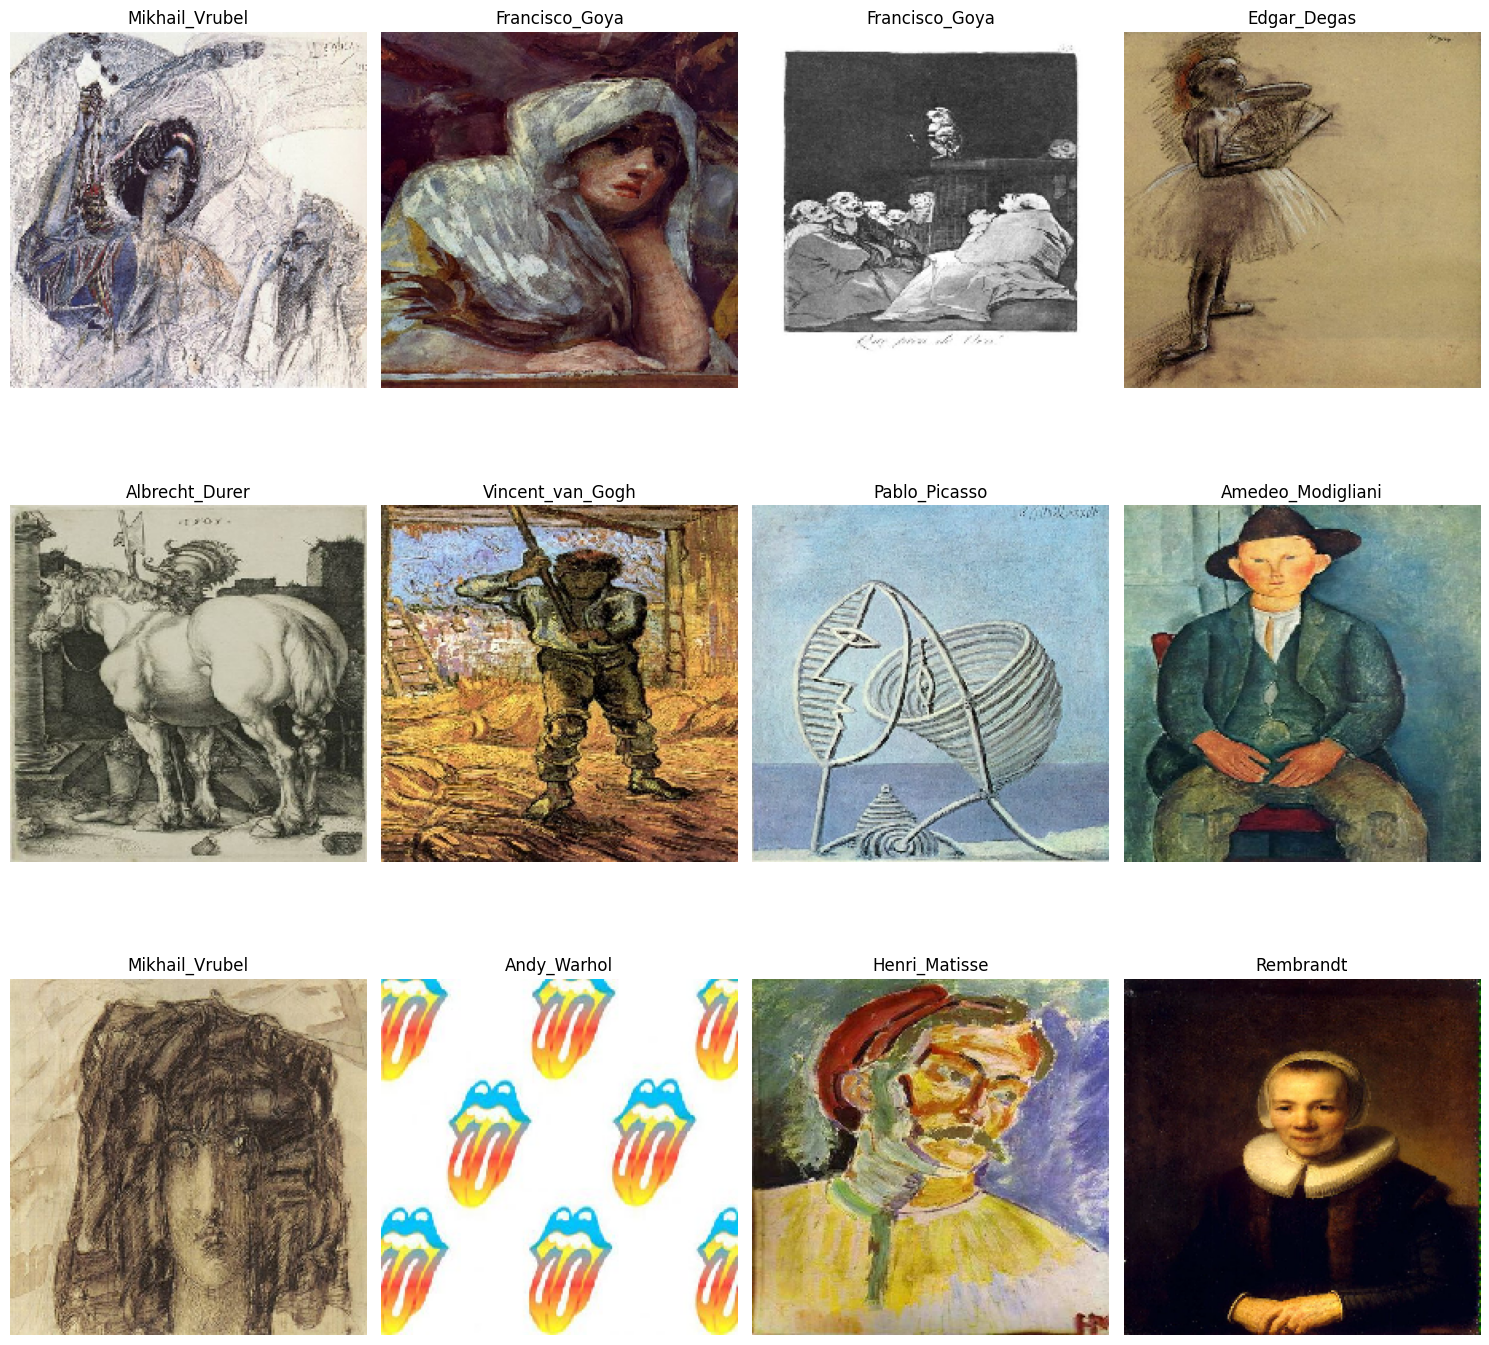

In [11]:
fig, axes = plt.subplots(3, 4, figsize=(15, 15))
random_indices = np.random.choice(df_train.index, size=12, replace=False)
for i, ax in zip(random_indices, axes.flatten()):
    img = keras.preprocessing.image.load_img(df_train.full_path[i], target_size=(224, 224))
    ax.imshow(img)
    ax.set_title(df_train.painter[i])
    ax.axis('off')
plt.tight_layout()
plt.show()

LabelEncoder

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_train['label'] = le.fit_transform(df_train['painter']) # TODO: encode the painters' names
df_train.head()

,full_path,painter,label
0,data/Vincent_van_Gogh_459.jpg,Vincent_van_Gogh,24
1,data/Pablo_Picasso_248.jpg,Pablo_Picasso,13
2,data/Edgar_Degas_366.jpg,Edgar_Degas,4
3,data/Marc_Chagall_59.jpg,Marc_Chagall,11
4,data/Edgar_Degas_405.jpg,Edgar_Degas,4


In [13]:
print(df_train['label'].unique().min())
print(df_train['label'].unique().max())

0
24


In [14]:
import shutil

# create a folder for each label
for label in df_train.label.unique():
    os.makedirs(f'data/{label}', exist_ok=True)

# move each image to its corresponding label folder
for i, row in df_train.iterrows():
    shutil.move(row.full_path, f'data/{row.label}')

image_dataset_from_directory

In [15]:
from keras.utils import image_dataset_from_directory
SEED = 42
train_dataset = image_dataset_from_directory(# TODO
   directory= './data/',
   labels='inferred',
   label_mode='categorical',
   color_mode='rgb',
   shuffle = True,
   subset='training',
   validation_split=0.1,
   seed=SEED,
   batch_size=32,
   image_size=(256, 256),
   interpolation='bilinear'
)

# find the class names so in prediction time we can map the predictions to the painters properly
class_names2 = train_dataset.class_names
print('Class names:', class_names2)


Found 6516 files belonging to 25 classes.
Using 5865 files for training.
Class names: ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '3', '4', '5', '6', '7', '8', '9']


In [ ]:
len(train_dataset)

11

In [16]:
val_dataset = image_dataset_from_directory(# TODO
   directory = './data/',
   labels = 'inferred' ,
   label_mode = 'categorical',
   color_mode ='rgb',
   shuffle = False,
   subset = 'validation',
   validation_split = 0.1,
   seed = SEED,
   batch_size = 32,
   image_size = (256, 256),
   interpolation = 'bilinear'
)

Found 6516 files belonging to 25 classes.
Using 651 files for validation.


In [17]:
test_dataset = image_dataset_from_directory(# TODO
   directory = './test_data/',
   labels = 'inferred' ,
   label_mode = None,
   color_mode ='rgb',
   shuffle = False,
   batch_size = 32,
   image_size = (256, 256),
   interpolation = 'bilinear'
)

Found 300 files.


keras.applications.resnet50.preprocess_input

In [18]:
from keras.applications.resnet50 import preprocess_input

# Preprocess the data
train_dataset_preprocess = train_dataset.map(lambda x, y: (preprocess_input(x), y)) # TODO: apply the preprocess_input function to the train_dataset
val_dataset_preprocess = val_dataset.map(lambda x, y: (preprocess_input(x), y))
test_dataset_preprocess = test_dataset.map(lambda x: (preprocess_input(x))) # TODO: apply the preprocess_input function to the val_dataset

In [19]:
train_dataset_preprocess

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 25), dtype=tf.float32, name=None))>

<h2 dir=rtl align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Create Model 
</font>
</h2>
In this project, we will dive into **ResNet (Residual Network)**, a groundbreaking convolutional neural network architecture developed by researchers at Microsoft. ResNet introduced a novel approach to solving the vanishing gradient problem that occurs when training very deep neural networks. This is achieved using **Residual Blocks** and a technique called **skip connection**.


<center>
<img align="center" src="https://quera.org/qbox/view/bmFJQOQRQY/residual_block.png">
</center>


In [20]:
import plotly.express as px

# metric: 'accuracy' or 'loss'
def display_curves(history, metric):
  df = pd.DataFrame(history.history[metric], columns=[metric])
  df['val_'+metric] = history.history['val_'+metric]
  fig = px.line(df, x= df.index+1, y= [metric, 'val_'+metric])
  fig.update_layout(xaxis_title='Epochs', yaxis_title=metric)
  fig.show()

In [21]:
model = keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    # input_tensor=None,
    input_shape=(256, 256, 3),
    pooling="avg",
    # classes=25,
    classifier_activation="softmax",
    name="resnet50" # TODO
)

model.trainable = False
x = keras.layers.Flatten()(model.output)
x = keras.layers.Dense(128,activation='relu', kernel_initializer="he_normal")(x)
x = keras.layers.Dense(64,activation='relu', kernel_initializer="he_normal")(x)
x = keras.layers.Dense(25, activation='softmax')(x)
model = keras.models.Model(model.input, x)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [22]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,859,865 (91.02 MB)

 Trainable params: 272,153 (1.04 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [23]:
model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] # TODO
)

In [24]:
val_dataset_preprocess

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 25), dtype=tf.float32, name=None))>

In [25]:
from keras.utils import to_categorical

early_stopping_cb = keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True, monitor='val_accuracy')
history = model.fit(
   train_dataset_preprocess,
   # to_categorical(train_dataset),
   epochs=100,
   validation_data=val_dataset_preprocess,
   callbacks=[early_stopping_cb]
)

Epoch 1/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 64s 268ms/step - accuracy: 0.4091 - loss: 2.1243 - val_accuracy: 0.6513 - val_loss: 1.1531
Epoch 2/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 37s 202ms/step - accuracy: 0.7448 - loss: 0.8155 - val_accuracy: 0.8495 - val_loss: 0.5120
Epoch 3/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 42s 210ms/step - accuracy: 0.8543 - loss: 0.5028 - val_accuracy: 0.8756 - val_loss: 0.4047
Epoch 4/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 39s 211ms/step - accuracy: 0.8954 - loss: 0.3417 - val_accuracy: 0.8863 - val_loss: 0.3797
Epoch 5/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 37s 198ms/step - accuracy: 0.9353 - loss: 0.2202 - val_accuracy: 0.8971 - val_loss: 0.3797
Epoch 6/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 42s 201ms/step - accuracy: 0.9458 - loss: 0.1824 - val_accuracy: 0.9293 - val_loss: 0.2618
Epoch 7/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 40s 213ms/step - accuracy: 0.9746 - loss: 0.0946 - val_accuracy: 0.9416 - val_loss: 0.2292
Epoch 8/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 38s 208ms/step - accuracy: 0.9871 -

In [26]:
model.save("model.keras")

In [27]:
display_curves(history, 'loss')

In [28]:
display_curves(history, 'accuracy')

<h2 dir=rtl align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Prediction
</font>
</h2>


In [29]:
# TODO: evaluate the model on the validation dataset

In [30]:
predictions = model.predict(test_dataset_preprocess)
predictions

10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 627ms/step


array([[7.66425487e-03, 4.66736164e-11, 6.04394019e-01, ...,
        1.20456960e-08, 6.23624073e-04, 3.91238700e-06],
       [7.30651140e-09, 2.39611541e-06, 1.57114997e-08, ...,
        1.42079637e-09, 1.72784951e-08, 5.01769304e-04],
       [9.99683261e-01, 2.43052822e-12, 2.98811938e-04, ...,
        1.82838404e-13, 4.17079132e-12, 1.15689325e-08],
       ...,
       [9.51957020e-08, 4.45030963e-08, 3.31210867e-05, ...,
        6.88122191e-06, 1.34715117e-06, 2.00232273e-04],
       [1.68818654e-13, 2.12882142e-11, 3.09391734e-10, ...,
        8.22187096e-10, 2.32730724e-08, 3.27076033e-09],
       [1.16535769e-13, 1.48111585e-08, 2.73720843e-07, ...,
        7.33056339e-04, 2.10478191e-07, 4.51960441e-05]], dtype=float32)

In [31]:
predicted_labels = [class_names2[np.argmax(pred)] for pred in predictions]
predicted_labels

['10',
 '3',
 '0',
 '13',
 '5',
 '9',
 '21',
 '2',
 '1',
 '8',
 '1',
 '5',
 '2',
 '16',
 '18',
 '20',
 '4',
 '19',
 '1',
 '18',
 '17',
 '18',
 '11',
 '17',
 '19',
 '4',
 '21',
 '15',
 '21',
 '24',
 '2',
 '20',
 '1',
 '16',
 '17',
 '13',
 '18',
 '15',
 '13',
 '13',
 '6',
 '23',
 '20',
 '16',
 '23',
 '2',
 '24',
 '9',
 '3',
 '20',
 '6',
 '24',
 '22',
 '3',
 '17',
 '3',
 '0',
 '15',
 '7',
 '3',
 '3',
 '15',
 '4',
 '5',
 '13',
 '10',
 '9',
 '11',
 '23',
 '22',
 '4',
 '0',
 '19',
 '10',
 '21',
 '22',
 '2',
 '19',
 '11',
 '9',
 '4',
 '21',
 '8',
 '21',
 '7',
 '2',
 '2',
 '0',
 '15',
 '3',
 '11',
 '1',
 '3',
 '11',
 '15',
 '4',
 '10',
 '8',
 '3',
 '10',
 '7',
 '4',
 '16',
 '19',
 '9',
 '10',
 '8',
 '20',
 '18',
 '20',
 '24',
 '17',
 '18',
 '6',
 '23',
 '5',
 '19',
 '24',
 '19',
 '21',
 '24',
 '6',
 '9',
 '12',
 '15',
 '7',
 '4',
 '12',
 '23',
 '2',
 '6',
 '7',
 '17',
 '13',
 '7',
 '18',
 '22',
 '9',
 '9',
 '3',
 '13',
 '10',
 '7',
 '20',
 '19',
 '5',
 '13',
 '14',
 '12',
 '11',
 '14',
 '12',


In [32]:
class_names[22]

'Henri_Matisse'

In [33]:
predic = []
for i in predicted_labels:
  for index, row in df_train.iterrows():
      if row["label"] == int(i):
          predic.append(row["painter"])
          # print(row["painter"])

          break
predic

['Leonardo_da_Vinci',
 'Andy_Warhol',
 'Albrecht_Durer',
 'Pablo_Picasso',
 'Francisco_Goya',
 'Kazimir_Malevich',
 'Salvador_Dali',
 'Amedeo_Modigliani',
 'Alfred_Sisley',
 'Hieronymus_Bosch',
 'Alfred_Sisley',
 'Francisco_Goya',
 'Amedeo_Modigliani',
 'Peter_Paul_Rubens',
 'Pieter_Bruegel',
 'Rene_Magritte',
 'Edgar_Degas',
 'Rembrandt',
 'Alfred_Sisley',
 'Pieter_Bruegel',
 'Pierre-Auguste_Renoir',
 'Pieter_Bruegel',
 'Marc_Chagall',
 'Pierre-Auguste_Renoir',
 'Rembrandt',
 'Edgar_Degas',
 'Salvador_Dali',
 'Paul_Klee',
 'Salvador_Dali',
 'Vincent_van_Gogh',
 'Amedeo_Modigliani',
 'Rene_Magritte',
 'Alfred_Sisley',
 'Peter_Paul_Rubens',
 'Pierre-Auguste_Renoir',
 'Pablo_Picasso',
 'Pieter_Bruegel',
 'Paul_Klee',
 'Pablo_Picasso',
 'Pablo_Picasso',
 'Frida_Kahlo',
 'Titian',
 'Rene_Magritte',
 'Peter_Paul_Rubens',
 'Titian',
 'Amedeo_Modigliani',
 'Vincent_van_Gogh',
 'Kazimir_Malevich',
 'Andy_Warhol',
 'Rene_Magritte',
 'Frida_Kahlo',
 'Vincent_van_Gogh',
 'Sandro_Botticelli',
 'An

In [34]:
len(predic)

300

In [35]:
test_paths = test_dataset.file_paths
test_paths

['./test_data/test_0.jpg',
 './test_data/test_1.jpg',
 './test_data/test_10.jpg',
 './test_data/test_100.jpg',
 './test_data/test_101.jpg',
 './test_data/test_102.jpg',
 './test_data/test_103.jpg',
 './test_data/test_104.jpg',
 './test_data/test_105.jpg',
 './test_data/test_106.jpg',
 './test_data/test_107.jpg',
 './test_data/test_108.jpg',
 './test_data/test_109.jpg',
 './test_data/test_11.jpg',
 './test_data/test_110.jpg',
 './test_data/test_111.jpg',
 './test_data/test_112.jpg',
 './test_data/test_113.jpg',
 './test_data/test_114.jpg',
 './test_data/test_115.jpg',
 './test_data/test_116.jpg',
 './test_data/test_117.jpg',
 './test_data/test_118.jpg',
 './test_data/test_119.jpg',
 './test_data/test_12.jpg',
 './test_data/test_120.jpg',
 './test_data/test_121.jpg',
 './test_data/test_122.jpg',
 './test_data/test_123.jpg',
 './test_data/test_124.jpg',
 './test_data/test_125.jpg',
 './test_data/test_126.jpg',
 './test_data/test_127.jpg',
 './test_data/test_128.jpg',
 './test_data/test_12

In [36]:
file_names = []
for path in test_dataset.file_paths:
    file_name = path.split('/')[-1].split('.')[0]
    file_names.append(file_name)
print(file_names)

['test_0', 'test_1', 'test_10', 'test_100', 'test_101', 'test_102', 'test_103', 'test_104', 'test_105', 'test_106', 'test_107', 'test_108', 'test_109', 'test_11', 'test_110', 'test_111', 'test_112', 'test_113', 'test_114', 'test_115', 'test_116', 'test_117', 'test_118', 'test_119', 'test_12', 'test_120', 'test_121', 'test_122', 'test_123', 'test_124', 'test_125', 'test_126', 'test_127', 'test_128', 'test_129', 'test_13', 'test_130', 'test_131', 'test_132', 'test_133', 'test_134', 'test_135', 'test_136', 'test_137', 'test_138', 'test_139', 'test_14', 'test_140', 'test_141', 'test_142', 'test_143', 'test_144', 'test_145', 'test_146', 'test_147', 'test_148', 'test_149', 'test_15', 'test_150', 'test_151', 'test_152', 'test_153', 'test_154', 'test_155', 'test_156', 'test_157', 'test_158', 'test_159', 'test_16', 'test_160', 'test_161', 'test_162', 'test_163', 'test_164', 'test_165', 'test_166', 'test_167', 'test_168', 'test_169', 'test_17', 'test_170', 'test_171', 'test_172', 'test_173', 'te

In [37]:
submission = pd.DataFrame(columns=['file', 'artist'])
submission['file'] = file_names # df_test["painter"] # TODO: get the file names from the test dataset
submission['artist'] = predic # TODO: get the predictions from the model (name of the painter)
submission

,file,artist
0,test_0,Leonardo_da_Vinci
1,test_1,Andy_Warhol
2,test_10,Albrecht_Durer
3,test_100,Pablo_Picasso
4,test_101,Francisco_Goya
...,...,...
295,test_95,Pierre-Auguste_Renoir
296,test_96,Francisco_Goya
297,test_97,Rene_Magritte
298,test_98,Rene_Magritte
